In [85]:
import pandas as pd
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import os

In [86]:
file_format = 'Base-85//'
ftr_type = ['1-gramTF_4Endian//','123_gramTF-IDF//']
path = '//Users//dinuka//Dropbox//MURI-Dinuka//UW//Binary Classification//Simulations//'

# with open("DistinctLabels.txt", "rb") as fp:   # Unpickling
#         distinct_labels = pickle.load(fp)

# ML_models = ['SVM', 'LR', 'DT', 'RF', 'XGB', 'GNB', 'MNB', 'CNB', 'KNN', 'PTN']  
ML_models = ['SVM', 'LR', 'DT', 'RF', 'GNB', 'MNB', 'CNB', 'KNN', 'PTN']
num_exps = 50
Plot_data_mean = []
Plot_data_std = []

for ftr_type_num in range(0, len(ftr_type)):
    Data = []
    for exp_num in range(0, num_exps):
        Set_name = str(exp_num)
        file_name = path+ftr_type[ftr_type_num]+file_format+'Results-Set-'+Set_name+'.pkl'
        with open(os.path.expanduser(file_name), 'rb') as f:  # Python 3: open(..., 'rb')
#         SVM_Data, LR_Data, DT_Data, RF_Data, XGB_Data, GNB_Data, MNB_Data, CNB_Data, KNN_Data, PTN_Data = pickle.load(f)
            SVM_Data, LR_Data, DT_Data, RF_Data, GNB_Data, MNB_Data, CNB_Data, KNN_Data, PTN_Data = pickle.load(f)

#         Data.append([SVM_Data, LR_Data, DT_Data, RF_Data, XGB_Data, GNB_Data, MNB_Data, CNB_Data])
            Data.append([SVM_Data, LR_Data, DT_Data, RF_Data, GNB_Data, MNB_Data, CNB_Data, KNN_Data, PTN_Data])
    
    Model_mean = list(np.mean(Data, axis = 0))
    Plot_data_mean.append(Model_mean)
    Model_std = list(np.std(Data, axis = 0))
    Plot_data_std.append(Model_std)

In [87]:
Model_mean = list(np.mean(Data, axis = 0))
Model_std = list(np.std(Data, axis = 0))

for exp_models in range(0, len(ML_models)):
    print_str = '\n'+str(ML_models[exp_models])+' Results Summary:'
    print(print_str)
    
    
    print(Model_mean[exp_models],Model_std[exp_models])


SVM Results Summary:
96.01020000000003 0.6042664644012612

LR Results Summary:
94.47759999999998 0.7664321496388313

DT Results Summary:
62.0832 2.093291608926

RF Results Summary:
88.04979999999996 1.2383432319030125

GNB Results Summary:
94.1792 0.7677495424941654

MNB Results Summary:
94.54180000000002 0.8101646499323446

CNB Results Summary:
94.78660000000002 0.8033345753793987

KNN Results Summary:
79.1146 1.6188838253562232

PTN Results Summary:
94.01020000000003 0.8776137874942473


## Accuracy Plots across Different ML models for all 12 classes

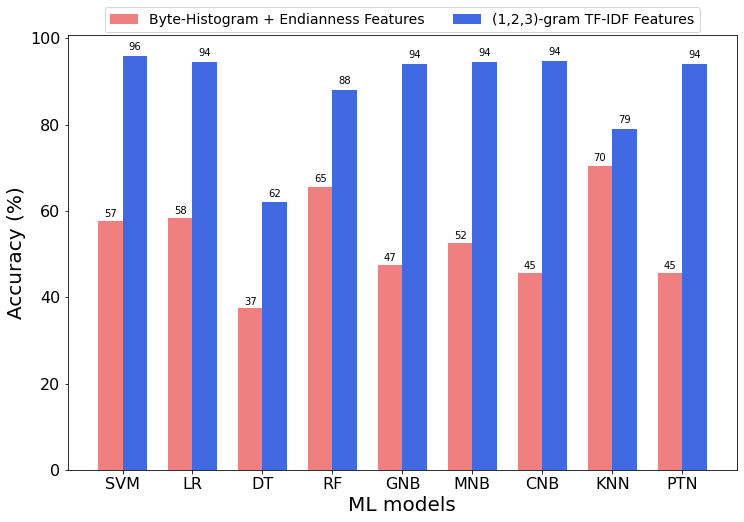

In [88]:
top_1 = Plot_data_mean[0]
top_3 = Plot_data_mean[1]
#top_5 = 

xlabels = ML_models
N =len(Plot_data_mean[0])
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='lightcoral')
rects2 = ax.bar(ind + width, top_3, width, color='royalblue')
#rects3 = ax.bar(ind + 2*width, top_5, width, color='g')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(xlabels,fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100],fontsize=16)
ax.set_xlabel("ML models", fontsize=20)
ax.set_ylabel("Accuracy (%)", fontsize=20)
#ax.set_title('Top-N ACC for 5 different models')
#ax.legend((rects1[0], rects2[0],rects3[0]),('top-1 acc', 'top-3 acc','top-5 acc'),bbox_to_anchor=(1.13, 1.01))
#ax.legend((rects1[0], rects2[0]),('Byte-Hist. + Endi.', '(1,2,3)-gram TF-IDF'),bbox_to_anchor=(1.13, 1.01), fontsize=14, loc = 'upper center')
ax.legend((rects1[0], rects2[0]),('Byte-Histogram + Endianness Features', '(1,2,3)-gram TF-IDF Features'),bbox_to_anchor=(.5, 1.08), fontsize=14, loc = 'upper center', ncol=2)

def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
labelvalue(rects1)
labelvalue(rects2)
#labelvalue(rects3)
plt.savefig('Results-B85.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

## Accuracy Plots across Different ML models for varying number of classes

In [5]:
Group_labels = []
for ii in range(0,len(distinct_labels)-1):
    Group_labels.append(str(len(distinct_labels) - ii))
    

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(Group_labels))
  
plt.bar(X_axis - 0.2, SVM_means, 0.4, label = 'SVM')
plt.bar(X_axis + 0.2, LR_means, 0.4, label = 'LR')
  
plt.xticks(X_axis, Group_labels)
plt.xlabel("Number of Architectures")
plt.ylabel("Accuracy (\%)")
#plt.title("Number of Students in each group")
plt.legend()
plt.show()

NameError: name 'SVM_means' is not defined